In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 8
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05 focal loss, gamma: 8 wd: 0.0, Lora alpha 8, rank 8


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	8.2173	Val Loss:	2.1792	Accuracy:	0.0828	F1:	0.0657
2 / 30: Train Loss:	7.8449	Val Loss:	2.1883	Accuracy:	0.0917	F1:	0.0753
3 / 30: Train Loss:	7.6540	Val Loss:	2.1825	Accuracy:	0.1568	F1:	0.1406
4 / 30: Train Loss:	7.5930	Val Loss:	2.1698	Accuracy:	0.2101	F1:	0.1737
5 / 30: Train Loss:	7.4496	Val Loss:	2.1553	Accuracy:	0.2337	F1:	0.2096
6 / 30: Train Loss:	7.0577	Val Loss:	2.1213	Accuracy:	0.2337	F1:	0.2133
7 / 30: Train Loss:	6.6826	Val Loss:	2.0693	Accuracy:	0.2840	F1:	0.2458
8 / 30: Train Loss:	6.1022	Val Loss:	1.9901	Accuracy:	0.3254	F1:	0.2949
9 / 30: Train Loss:	5.3689	Val Loss:	1.8937	Accuracy:	0.3521	F1:	0.3099
10 / 30: Train Loss:	4.7862	Val Loss:	1.8032	Accuracy:	0.3964	F1:	0.3527
11 / 30: Train Loss:	4.1949	Val Loss:	1.7609	Accuracy:	0.4053	F1:	0.3641
12 / 30: Train Loss:	3.8400	Val Loss:	1.7074	Accuracy:	0.4112	F1:	0.3838
13 / 30: Train Loss:	3.5681	Val Loss:	1.6621	Accuracy:	0.4231	F1:	0.3887
14 / 30: Train Loss:	3.3350	Val Loss:	1.6359	Accuracy:	0.440

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	8.2050	Val Loss:	2.1796	Accuracy:	0.0799	F1:	0.0620
2 / 30: Train Loss:	7.8261	Val Loss:	2.1857	Accuracy:	0.1124	F1:	0.0952
3 / 30: Train Loss:	7.6057	Val Loss:	2.1766	Accuracy:	0.1657	F1:	0.1441
4 / 30: Train Loss:	7.4758	Val Loss:	2.1550	Accuracy:	0.2249	F1:	0.1920
5 / 30: Train Loss:	7.1959	Val Loss:	2.1209	Accuracy:	0.2544	F1:	0.2336
6 / 30: Train Loss:	6.5078	Val Loss:	2.0403	Accuracy:	0.3047	F1:	0.2793
7 / 30: Train Loss:	5.7373	Val Loss:	1.9306	Accuracy:	0.3254	F1:	0.2938
8 / 30: Train Loss:	4.8871	Val Loss:	1.8018	Accuracy:	0.3846	F1:	0.3279
9 / 30: Train Loss:	4.1793	Val Loss:	1.7180	Accuracy:	0.4290	F1:	0.3989
10 / 30: Train Loss:	3.7606	Val Loss:	1.6779	Accuracy:	0.4379	F1:	0.4019
11 / 30: Train Loss:	3.3494	Val Loss:	1.6518	Accuracy:	0.4379	F1:	0.4130
12 / 30: Train Loss:	3.1546	Val Loss:	1.6190	Accuracy:	0.4290	F1:	0.3970
13 / 30: Train Loss:	2.9777	Val Loss:	1.6009	Accuracy:	0.4172	F1:	0.3806
14 / 30: Train Loss:	2.7908	Val Loss:	1.5874	Accuracy:	0.432

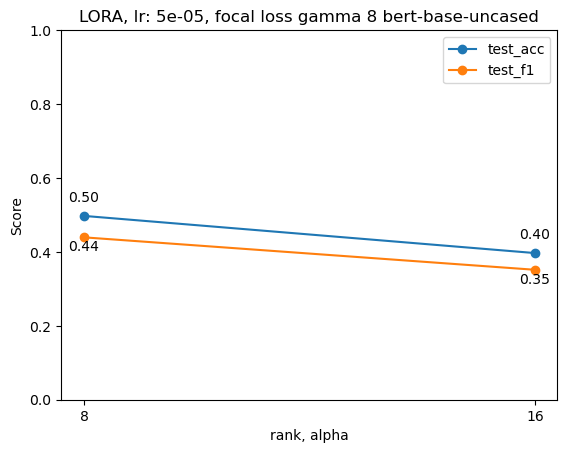

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f